In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# importing machine learning models for prediction
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.svm import SVC, LinearSVC

In [4]:
pd.options.display.max_columns = 999

In [5]:
# Read data
train_values = pd.read_csv('data/train_values.csv')
train_labels = pd.read_csv('data/train_labels.csv')
test_values = pd.read_csv('data/test_values.csv')

In [6]:
train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [7]:
train_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [20]:
X = train_values.iloc[0:1000,4:14]
X = pd.get_dummies(X, prefix_sep='_')
#X = StandardScaler().fit_transform(X)

In [7]:
X.head()

,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition_n,land_surface_condition_o,land_surface_condition_t,foundation_type_h,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_n,roof_type_q,roof_type_x,ground_floor_type_f,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_j,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_j,position_o,position_s,position_t
0,2,30,6,5,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1,2,10,8,7,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
2,2,10,5,5,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,2,10,6,5,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,3,30,8,9,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [9]:
#PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn import model_selection

Text(0.5, 1.0, 'hp')

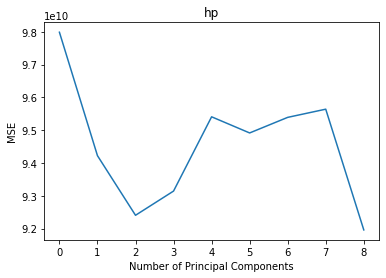

In [21]:
pca = PCA()
principalComponents = pca.fit_transform(scale(X))

#define cross validation
cv = RepeatedKFold(
    n_splits=10, 
    n_repeats=3,
    random_state=1
    )

RF = RandomForestClassifier()
mse = []

#calculate MSE
# score = -1 * model_selection.cross_val_score(
#     RF,
#     np.ones((len(principalComponents),1)), 
#     train_labels.iloc[0:1000,:], 
#     cv=cv,
#     scoring='neg_mean_squared_error'
#     ).mean()  
# mse.append(score)

for i in np.arange(1, 9):
    score = -1 * model_selection.cross_val_score(
        RF,
        principalComponents[:,:i], 
        train_labels.iloc[0:1000,:], 
        cv=cv, 
        scoring='neg_mean_squared_error'
        ).mean()
    mse.append(score)
    
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')

In [22]:
principalComponents.shape

(1000, 28)

In [34]:
PCA_df = pd.DataFrame(data=principalComponents[:,:2], columns=['PC1', 'PC2'])
PCA_df.shape

(1000, 2)

In [45]:
PCA_df.head(n=10)

,PC1,PC2
0,-0.992603,0.842049
1,-0.418072,-0.164274
2,-0.517583,-0.047643
3,-0.769923,-1.032599
4,-0.850404,0.634297
5,-1.146644,-0.162412
6,-0.670275,-1.089713
7,2.725105,-0.979951
8,-0.925813,0.672184
9,4.848776,-2.351783


In [80]:
# Add PCA components to DF
new_train_values = train_values.iloc[0:1000,:]
new_train_values = pd.concat([new_train_values, PCA_df], axis=1)

In [81]:
# Drop columns used for PCA
# columns #4 ~ #14: "count_floors_pre_eq" ~ "plan_configuration"
drop_list = new_train_values.columns[4:15]
new_train_values.drop(drop_list, axis=1, inplace=True)

In [82]:
new_train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,PC1,PC2
0,802906,6,487,12198,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,-0.992603,0.842049
1,28830,8,900,2812,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,-0.418072,-0.164274
2,94947,21,363,8973,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,-0.517583,-0.047643
3,590882,22,418,10694,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,-0.769923,-1.032599
4,201944,11,131,1488,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,-0.850404,0.634297


In [79]:
drop_list

Index(['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position'],
      dtype='object')